# Multinomial Naive Bayes

In [35]:
import pandas as pd

from utils.data import load_file
from utils.metrics import evaluate

from sklearn.naive_bayes import MultinomialNB

In [6]:
y_train = load_file("y_train.pickle")
y_test = load_file("y_test.pickle")
X_train_uni = load_file("X_train_uni.pickle")
X_test_uni = load_file("X_test_uni.pickle")
X_train_uni_sw = load_file("X_train_uni_sw.pickle")
X_test_uni_sw = load_file("X_test_uni_sw.pickle")
X_train_bi = load_file("X_train_bi.pickle")
X_test_bi = load_file("X_test_bi.pickle")
X_train_bi_sw = load_file("X_train_bi_sw.pickle")
X_test_bi_sw = load_file("X_test_bi_sw.pickle")
X_train_uni_bi = load_file("X_train_uni_bi.pickle")
X_test_uni_bi = load_file("X_test_uni_bi.pickle")
X_train_uni_bi_sw = load_file("X_train_uni_bi_sw.pickle")
X_test_uni_bi_sw = load_file("X_test_uni_bi_sw.pickle")

In [28]:
print(y_train.shape)
print(y_test.shape)

(25332,)
(6333,)


In [37]:
pd.DataFrame(y_train).label.value_counts()

positive    16781
negative     6796
neutral      1755
Name: label, dtype: int64

In [38]:
pd.DataFrame(y_test).label.value_counts()

positive    4135
negative    1770
neutral      428
Name: label, dtype: int64

In [43]:
print("Imbalanced data in train set:")
positive_percent = round(16781/25332*100,2)
negative_percent = round(6796/25332*100,2)
neutral_percent = round(1755/25332*100,2)

print(f"Postive - {positive_percent}")
print(f"Negative - {negative_percent}")
print(f"Neutral - {neutral_percent}")

Imbalanced data in train set:
Postive - 66.24
Negative - 26.83
Neutral - 6.93


In [44]:
print("Imbalanced data in test set:")
positive_percent = round(4135/6333*100,2)
negative_percent = round(1770/6333*100,2)
neutral_percent = round(428/6333*100,2)

print(f"Postive - {positive_percent}")
print(f"Negative - {negative_percent}")
print(f"Neutral - {neutral_percent}")

Imbalanced data in test set:
Postive - 65.29
Negative - 27.95
Neutral - 6.76


## Customized Test Cases

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_1 = "the chicken rice is delicious"
review_2 = "the chicken rice is bad"
review_3 = "the chicken rice taste average"

test_data = pd.DataFrame(
                {"text":[review_1, review_2, review_3]}
            )

print(test_data)

tfidf = TfidfVectorizer(ngram_range=(1, 1))
X_test_customized = tfidf.transform(test_data["text"])

print(X_test_customized.shape)

                             text
0   the chicken rice is delicious
1         the chicken rice is bad
2  the chicken rice taste average


NotFittedError: The TF-IDF vectorizer is not fitted

## Comparison of MultinomimalNB withdifferent preprocessing steps

##### Unigrams

In [10]:
print(X_train_uni.shape)
print(X_test_uni.shape)

(25332, 33634)
(6333, 33634)


In [45]:
model_uni = MultinomialNB()
model_uni.fit(X_train_uni, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.64      0.76      1770
     neutral       0.00      0.00      0.00       428
    positive       0.80      0.99      0.88      4135

    accuracy                           0.82      6333
   macro avg       0.57      0.54      0.55      6333
weighted avg       0.78      0.82      0.79      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


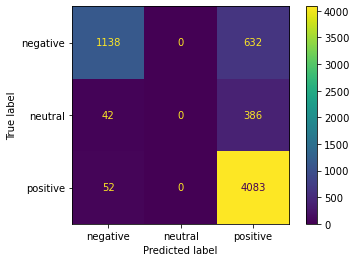

In [50]:
y_pred_uni = model_uni.predict(X_test_uni)
evaluate(y_pred_uni)

##### Unigrams + Stop Words

In [11]:
print(X_train_uni_sw.shape)
print(X_test_uni_sw.shape)

(25332, 33926)
(6333, 33926)


In [51]:
model_uni_sw = MultinomialNB()
model_uni_sw.fit(X_train_uni_sw, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.59      0.73      1770
     neutral       0.00      0.00      0.00       428
    positive       0.79      0.99      0.88      4135

    accuracy                           0.81      6333
   macro avg       0.58      0.53      0.53      6333
weighted avg       0.78      0.81      0.78      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


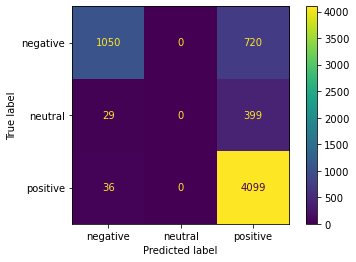

In [52]:
y_pred_uni_sw = model_uni_sw.predict(X_test_uni_sw)
evaluate(y_pred_uni_sw)

##### Bigrams

In [12]:
print(X_train_bi.shape)
print(X_test_bi.shape)

(25332, 613031)
(6333, 613031)


In [53]:
model_bi = MultinomialNB()
model_bi.fit(X_train_bi, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.20      0.33      1770
     neutral       0.00      0.00      0.00       428
    positive       0.69      1.00      0.82      4135

    accuracy                           0.71      6333
   macro avg       0.56      0.40      0.38      6333
weighted avg       0.73      0.71      0.63      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


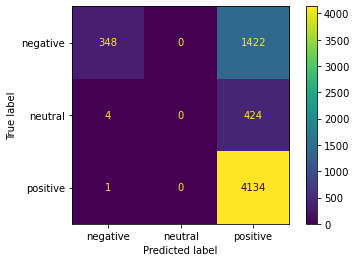

In [54]:
y_pred_bi = model_bi.predict(X_test_bi)
evaluate(y_pred_bi)

##### Bigrams + Stop Words

In [13]:
print(X_train_bi_sw.shape)
print(X_test_bi_sw.shape)

(25332, 549842)
(6333, 549842)


In [62]:
model_bi_sw = MultinomialNB()
model_bi_sw.fit(X_train_bi_sw, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.26      0.42      1770
     neutral       0.00      0.00      0.00       428
    positive       0.71      1.00      0.83      4135

    accuracy                           0.73      6333
   macro avg       0.57      0.42      0.42      6333
weighted avg       0.74      0.73      0.66      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


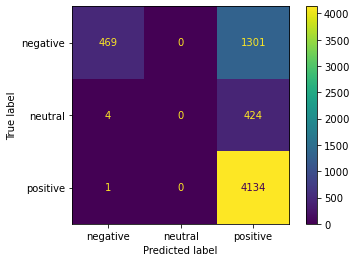

In [63]:
y_pred_bi_sw = model_bi_sw.predict(X_test_bi_sw)
evaluate(y_pred_bi_sw)

##### Unigrams + Bigrams

In [15]:
print(X_train_uni_bi.shape)
print(X_test_uni_bi.shape)

(25332, 646665)
(6333, 646665)


In [65]:
model_uni_bi = MultinomialNB()
model_uni_bi.fit(X_train_uni_bi, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.24      0.38      1770
     neutral       0.00      0.00      0.00       428
    positive       0.70      1.00      0.82      4135

    accuracy                           0.72      6333
   macro avg       0.56      0.41      0.40      6333
weighted avg       0.73      0.72      0.64      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


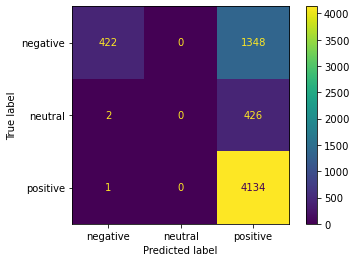

In [66]:
y_pred_uni_bi = model_uni_bi.predict(X_test_uni_bi)
evaluate(y_pred_uni_bi)

##### Unigrams + Bigrams + Stop Words

In [16]:
print(X_train_uni_bi_sw.shape)
print(X_test_uni_bi_sw.shape)

(25332, 583768)
(6333, 583768)


In [67]:
model_uni_bi_sw = MultinomialNB()
model_uni_bi_sw.fit(X_train_uni_bi_sw, y_train)

MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.17      0.30      1770
     neutral       0.00      0.00      0.00       428
    positive       0.69      1.00      0.81      4135

    accuracy                           0.70      6333
   macro avg       0.56      0.39      0.37      6333
weighted avg       0.73      0.70      0.61      6333

Confusion Matrix:


C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ching\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


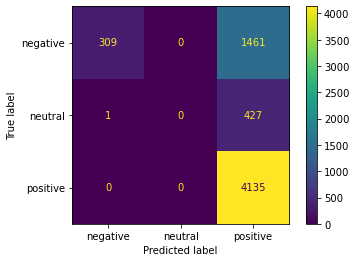

In [68]:
y_pred_uni_bi_sw = model_uni_bi_sw.predict(X_test_uni_bi_sw)
evaluate(y_pred_uni_bi_sw)